# Basics of NLP: DataFrame rudiments and spaCy

## Libraries 

We will consider a corpus of radio recordings in french (source: France inter, RFI, ...) :  RADIOS.txt


The first step in writing python code is determining which libraries we want to use. To stay organized, we generally import all libraries at the top (of a notebook or a standalone python file).

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from numpy import log
from collections import Counter
import nltk
from nltk.util import ngrams
import math


## Pandas Dataframe basics

In this TP we use Pandas [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) to manage our dataset. Pandas is a standard tool in data science.

In [2]:
df_radios = pd.read_csv('RADIOS.txt', names=['text'])

In [3]:
print(len(df_radios))
df_radios.head()

35356


,text
0,patricia martin que voici que voilà
1,oh bonjour nicolas stoufflet
2,france-inter sept heures
3,le journal simon tivolle
4,bonjour


We can list the columns of a dataset ````df```` by calling ````df.columns````.

**Question**: What are the columns of the dataset ````df_radios````?

**-** The dataset contains a single column, 'text', which holds text data from radio recordings.
python


In [4]:
df_radios.columns

Index(['text'], dtype='object')

We can access to a specific using ````df.loc[i]```` or ````df.iloc[i]```` 


**Question**: What is the difference between .loc and .iloc?

**-** ".loc" is label-based, meaning it uses labels/index to access data, while ".iloc" is integer position-based, so it uses numerical indexes to access data.

In [5]:
one_text = df_radios.iloc[4].text
one_text

'bonjour'

We can count the number of words in a string using the ````len```` function and ````split```` method of strings. For example:


```
string = "bla bla bla"
len(string.split(" "))
>>> 3
```

**Question**: Fill in the following function and run it for a our ````one_text```` example. 






In [6]:
def num_words(sentence):
    '''
    Calculate the number of words in the sentence.
    '''
    return len(sentence.split(" "))

num_words(one_text)

1


Furthermore, we can calculate values for each row, based on a specific column, using the ````apply```` method:

```
lengths = df.column_name.apply(lambda text: num_words(text))
```

This will give us a [pandas Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) of the lengths of each text.

**Question**: Add the length of each text as a new column in the dataframe (see [pandas docs](https://pandas.pydata.org/docs/user_guide/dsintro.html#basics-dataframe-sel-add-del) for details). 

**Question**: What is the distribution of the length of the texts in words? Visualize this using a python plot (see [plt.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)).

**-** This histogram shows the distribution of text lengths (in words) within the dataset. Most texts are relatively short, with a few longer outliers.



(array([1.2295e+04, 9.6080e+03, 5.9810e+03, 3.1830e+03, 1.4720e+03,
        8.0400e+02, 4.9600e+02, 3.2700e+02, 2.0900e+02, 1.4300e+02,
        1.3100e+02, 1.0100e+02, 8.5000e+01, 8.4000e+01, 6.3000e+01,
        5.0000e+01, 4.7000e+01, 2.7000e+01, 3.1000e+01, 3.6000e+01,
        3.9000e+01, 1.4000e+01, 2.6000e+01, 1.2000e+01, 1.6000e+01,
        1.0000e+01, 1.3000e+01, 9.0000e+00, 5.0000e+00, 2.0000e+00,
        5.0000e+00, 3.0000e+00, 6.0000e+00, 2.0000e+00, 2.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 0.0000e+00,
        2.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

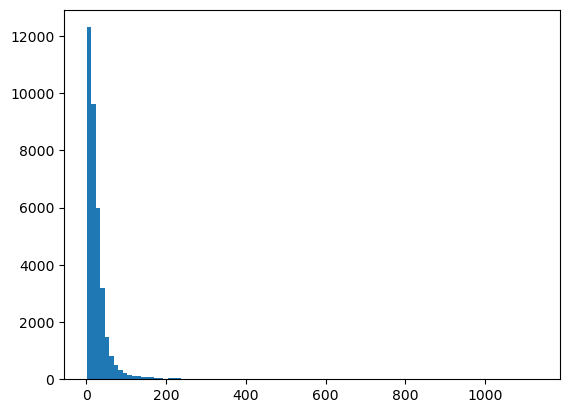

In [7]:

lengths = df_radios.text.apply(lambda text: num_words(text)) #todo 

plt.hist(lengths,bins=100) 

We can filter a dataframe using criteria based on values in certain columns. The basic syntax for this is:

````
new_df = df[df["column"].apply(lambda row_value: my_func(row_value) == some_value)]
````

This gives a new DataFrame composed of all elements of ````df```` such the values of the function ````myfunc````, calculated for the value of column "column" for each row is equal to some_value. For example, if we wanted all rows that begin with "a", we could run:

````
df_letter_A = df[df["text"].apply(lambda text: text[0] == "a")]
````

**Question**: Retain only documents with at least 50 words

**-** To filter documents with at least 50 words, you apply a condition to the DataFrame that checks the number of words in each document. This is done using the apply method with a lambda function that counts the words using the previously defined num_words function.

In [8]:
df_radios[df_radios["text"].apply(lambda row_value: num_words(row_value) >=50)]

,text
34,il quitte l' école à douze ans pour aider son ...
42,selon jack lang césar était était l' une des f...
45,la chaîne de l' espoir c'est une association c...
46,l' association a été créée par un professeur e...
100,nicole notat est arrivée en trois ans à réduir...
...,...
35344,rappelons que le dix-sept juin dernier les reb...
35346,la tension est montée ces derniers jours entre...
35347,l' émir du koweït jaber al ahmed assabah a sép...
35349,la position de claudette est restée quasiment ...


### Finding useful information in the text:

We will implement regular expresions (regex) to filter the text according to a specific condiction. 

To implement the regex evaluation in Pandas we use the [`Series.str.contains`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html) filtering function, as :

```` df.column_name.str.contains('[a-z]', regex=True)````

Also useful: `match`, `Series.str.startswith`, `Series.str.endswith`


**Question**  : How many texts are there with at least one word of 9 letters in RADIOS.txt?

**-** To find texts with at least one 9-letter word, we used the str.contains method with a regex pattern that matches words of 9 or more characters, there are: 26559 words.

**Question**  : Are there any texts with words without vowels in RADIOS.txt?

**-** For texts with words that have no vowels, the regex pattern changes to match words composed only of consonants, we found 58.


You can use the following regexs : 

| regex | Description |
|--------|--------------------|
|`'[A-Z]'`|filtre lignes contenant une majuscule|
|`'^[A-Z]'`|filtre lignes commençant par une majuscule|
|`'[A-Z]$'`|filtre lignes finissant par une majuscule|
|`'^[A-Z]*$'`|filtre lignes entièrement majuscules|
|`'[aeiouAEIOU]'`|filtre lignes contenant une voyelle|
|`'^[aeiouAEIOU]'`|filtre lignes commençant par une voyelle|
|`'[aeiouAEIOU]$'`|filtre lignes finissant par une voyelle|
|`'^[^aeiouAEIOU]'`|filtre lignes commençant par une non-voyelle|
|`'[^aeiouAEIOU]$'`|filtre lignes finissant par une non-voyelle|
|`'[aeiouAEIOU].*[aeiouAEIOU]'`|filtre lignes avec au moins deux voyelles|
|`'^[^aeiouAEIOU]*[aeiouAEIOU][^aeiouAEIOU]*$'`| filtre lignes avec exactement une voyelle|

Avec expressions régulières:

| Expression | Match |
|--------|--------------------|
|`a`|la lettre "a"|
|`[a-z]`|une lettre minuscule|
|`[A-Z]`|une lettre majuscule|
|`[0-9]`|un chiffre|
|`[0123456789]`|un chiffre|
|`[aeiouAEIOU]`|une voyelle|
|`[^aeiouAEIOU]`|tout sauf une voyelle|
|`.`|un caractère|
|`^`|début de ligne|
|`$`|fin de ligne|
|`x*`| "x" répété 0 fois ou plus|
|``x+``| "x" répété 1 fois ou plus|
|`x\|y`| "x" ou "y"|

In [9]:
df_radios['a-z'] = df_radios.text.str.contains('[a-z]', regex=True)
df_radios['9 letters'] = df_radios.text.str.contains("\w{9,}", regex=True)#TODO
df_radios['no vowels'] = df_radios.text.str.contains("^[^aeiouAEIOU]+$", regex=True)
df_radios[df_radios.text.str.contains("\w{9,}", regex=True)]

,text,a-z,9 letters,no vowels
1,oh bonjour nicolas stoufflet,True,True,False
6,deux incendies cette nuit en région_parisienne...,True,True,False
7,et puis dans le neuvième arrondissement de par...,True,True,False
8,le sculpteur césar est décédé hier à l' âge de...,True,True,False
10,la chaîne de l' espoir association de médecins...,True,True,False
...,...,...,...,...
35351,sport athlétisme pour terminer le triple champ...,True,True,False
35352,l' éthiopienne defar meseret est entrée quatri...,True,True,False
35353,la fin de cette édition le rappel de ses princ...,True,True,False
35354,au libéria l' armée de charles taylor en alert...,True,True,False


In [10]:
df_radios['9 letters'].sum()


26559

In [11]:
df_radios['no vowels'].sum()

58

## Vocabulary 

We will create a a dictionary as the vocabulary for our corpus of texts. 
Create a dictionary where each key is a word and the value will be its frequency. 

```` texts_vocab = {'key1':value, 'key2':value} ````

**Question** Create a Vocabulary of bigrams and trigrams 

**Question** How many different words exist in our corpus of texts?

**-** There are 34035 of different words in the corpus.

**Question**: What is the frequency distribution of the words? use ```plt.hist```

**-** The frequency distribution of the words are mostly comprised between 0 and 50.

**Question** [optional] How many bigrams and trigrams exist? Visualize the frequency distribution. 

**-** There are 295811 different bigrams in the corpus and 620591 different trigrams.


Number of different words in the corpus: 34035


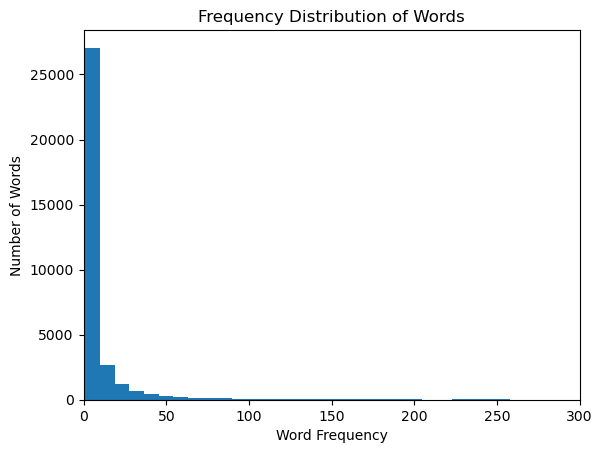

In [12]:
words = df_radios['text'].str.split()
words_flat = [word for sublist in words for word in sublist]

word_freq = Counter(words_flat)

num_unique_words = len(word_freq)

print("Number of different words in the corpus:", num_unique_words)

plt.hist(word_freq.values(), bins=5000)
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.title('Frequency Distribution of Words')
plt.xlim(0, 300)
plt.show()

Number of different bigrams in the corpus: 295811
Number of different trigrams in the corpus: 620591


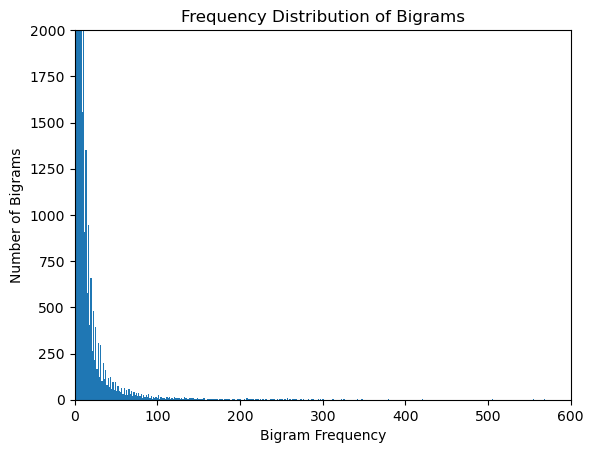

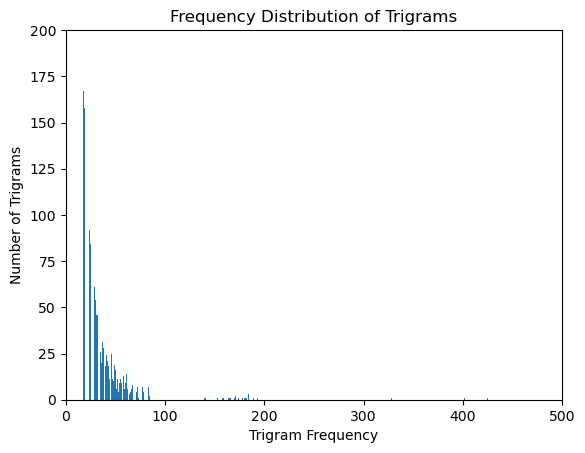

In [13]:
def create_ngrams(words, n):
    return list(ngrams(words, n))
words = df_radios['text'].str.split()
words_flat = [word for sublist in words for word in sublist]

bigrams = create_ngrams(words_flat, 2)
trigrams = create_ngrams(words_flat, 3)

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

num_unique_bigrams = len(bigram_freq)
num_unique_trigrams = len(trigram_freq)

print("Number of different bigrams in the corpus:", num_unique_bigrams)
print("Number of different trigrams in the corpus:", num_unique_trigrams)

plt.hist(bigram_freq.values(), bins=5000)
plt.xlabel('Bigram Frequency')
plt.ylabel('Number of Bigrams')
plt.title('Frequency Distribution of Bigrams')
plt.xlim(0, 600)
plt.ylim(0, 2000)
plt.show()

plt.hist(trigram_freq.values(), bins=5000)
plt.xlabel('Trigram Frequency')
plt.ylabel('Number of Trigrams')
plt.title('Frequency Distribution of Trigrams')
plt.xlim(0, 500)
plt.ylim(0, 200)
plt.show()

## Introduction to spaCy

spaCy is a package that performs some basic NLP tasks for us, based on training on a large corpus. We can import spaCy libraries for different languages and of different complexities (often in small, medium, and large sizes, where larger means slower to use but with slightly more precise behaviour). For our use case, we will "fr_core_news_sm", which is the small French language  model.

For basic questions about spaCy, refer to the documentation [here](https://spacy.io/usage/spacy-101).

In [14]:
!python -m spacy download fr_core_news_sm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


In [15]:
import spacy
from spacy.lang.fr.examples import sentences 
nlp = spacy.load("fr_core_news_sm")

The ````nlp```` object can be used to analyze documents. For example:

````doc_analyzed = nlp("Hello world")
doc_analyzed
>>> Hello world
type(doc_analyzed)
>>> spacy.tokens.doc.Doc
````

In [16]:
doc = nlp(one_text)
type(doc)

spacy.tokens.doc.Doc

In [18]:
nlp.max_length = 200000000  
with open("RADIOS.txt", "r") as file:
    text = file.read(1024 * 1024) 
    if len(text) < nlp.max_length:
        doc = nlp(text)
        print(' '.join(token.text for token in doc[:100]))
    else:
        print("Le texte dépasse la limite maximale autorisée après ajustement.")

patricia martin que voici que voilà 
 oh bonjour nicolas stoufflet 
 france - inter sept heures 
 le journal simon tivolle 
 bonjour 
 lundi sept décembre 
 deux incendies cette nuit en région_parisienne dans une maison de retraite de livry - gargan en seine-saint-denis sept personnes ont péri dans les flammes 
 et puis dans le neuvième arrondissement de paris le feu a pris dans un immeuble d ' habitation et trois personnes ont été tuées 
 le sculpteur césar est décédé hier à l ' âge de soixante dix-sept ans il était devenu célèbre grâce à ses


In [29]:
entire_doc = nlp(text)

print(entire_doc[:10])

patricia martin que voici que voilà
oh bonjour nicolas stoufflet
france-inter sept heures
le journal simon tivolle
bonjour
lundi sept décembre
deux incendies cette nuit en région_parisienne dans une maison de retraite de livry-gargan en seine-saint-denis sept personnes ont péri dans les flammes
et puis dans le neuvième arrondissement de paris le feu a pris dans un immeuble d' habitation et trois personnes ont été tuées
le sculpteur césar est décédé hier à l' âge de soixante dix-sept ans il était devenu célèbre grâce à ses



**Question**: Use spaCy to list each token in the ````text```` of the document with id 1500.

*Hint: spacy.tokens.doc.Doc is an iterable*

In [31]:
doc = nlp(df_radios.iloc[1500].text)
for token in doc:
    print(token.text)

c'
est
pour
ça
que
nous
sommes
associés
à
elle


In [32]:
doc = nlp(df_radios.iloc[1500].text)

**Question**: List the POS of every token from the previous exercise. Do you agree with spaCy?

*Hint: use token.pos_*

In [33]:
doc = nlp(df_radios.iloc[1500].text)
for token in doc:
    print(token.pos_)

PRON
AUX
ADP
PRON
PRON
PRON
AUX
VERB
ADP
PRON


The lemma of a term is the simplest and most distilled version of the term, without prefixes, suffixes, etc. Converting terms to lemmas can be useful in order to reduce the vocabulary size of a corpus and group terms into equivalence classes. For example, "run", "runs", "running", and "ran" all share roughly the same semantic meaning, and in some contexts (though not all!) should be treated the same way.

**Question**: extract the lemmas from the previous exercise. Which terms stay the same, and which differ? In what ways do they differ?

**-** Lemmatization changes verbs to their infinitive form ( "est" and "sommes" to "être"), while pronouns and prepositions largely remain unchanged. This process simplifies text to its base form. However, pronouns maintain their original form, preserving sentence integrity.

*Hint: use token.lemma_*

In [34]:
doc = nlp(df_radios.iloc[1500].text)
for token in doc:
    print(token.lemma_)

ce
être
pour
cela
que
nous
être
associer
à
lui


**Question**: How many unique terms are there among all the texts? How many unique *lemmas* are there among all the texts?

**-** There are 14988 unique terms among all the texts analyzed.

**-** There are 10876 unique lemmas among all the texts analyzed.

In [56]:
unique_terms = set()
for token in entire_doc:
    unique_terms.add(token.text)
num_unique_terms = len(unique_terms)
num_unique_terms

14988

In [55]:
unique_lemmas = set()

for token in entire_doc:
    unique_lemmas.add(token.lemma_)

num_unique_lemmas = len(unique_lemmas)
num_unique_lemmas

10876

**Question**: Plot the distribution of POS over the all the texts.

In [36]:
dict_pos  = Counter()

dict_pos.update([token.pos_ for token in entire_doc])

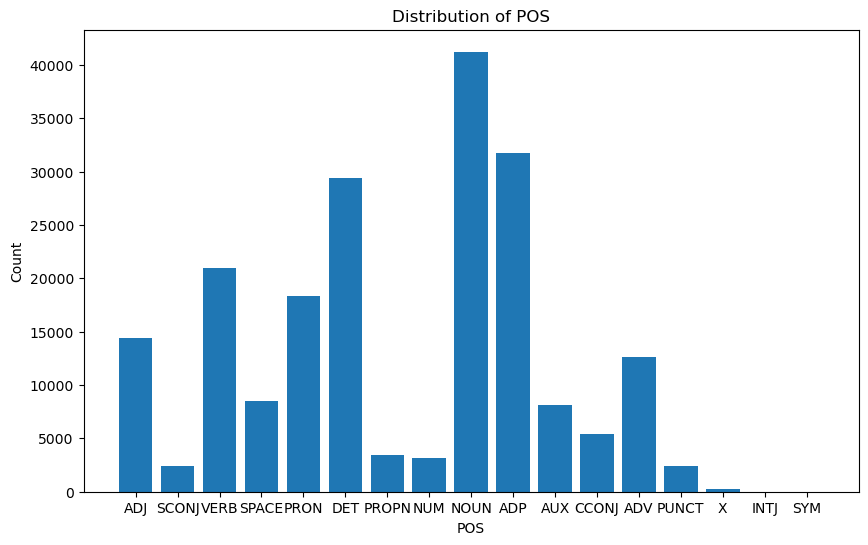

In [37]:
pos = list(dict_pos.keys())
count = list(dict_pos.values())
plt.figure(figsize=(10, 6))
plt.bar(pos, count)

plt.xlabel('POS')
plt.ylabel('Count')
plt.title('Distribution of POS')

plt.show()

**Question**: Plot the distribution of the 100 most common words over the all the texts, provided that they are not space or punctuation. Use a log scale for the y axes and describe the graph: the y axis should be frequency, and the x axis should be words sorted by frequency.

*Hint: see [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law)*

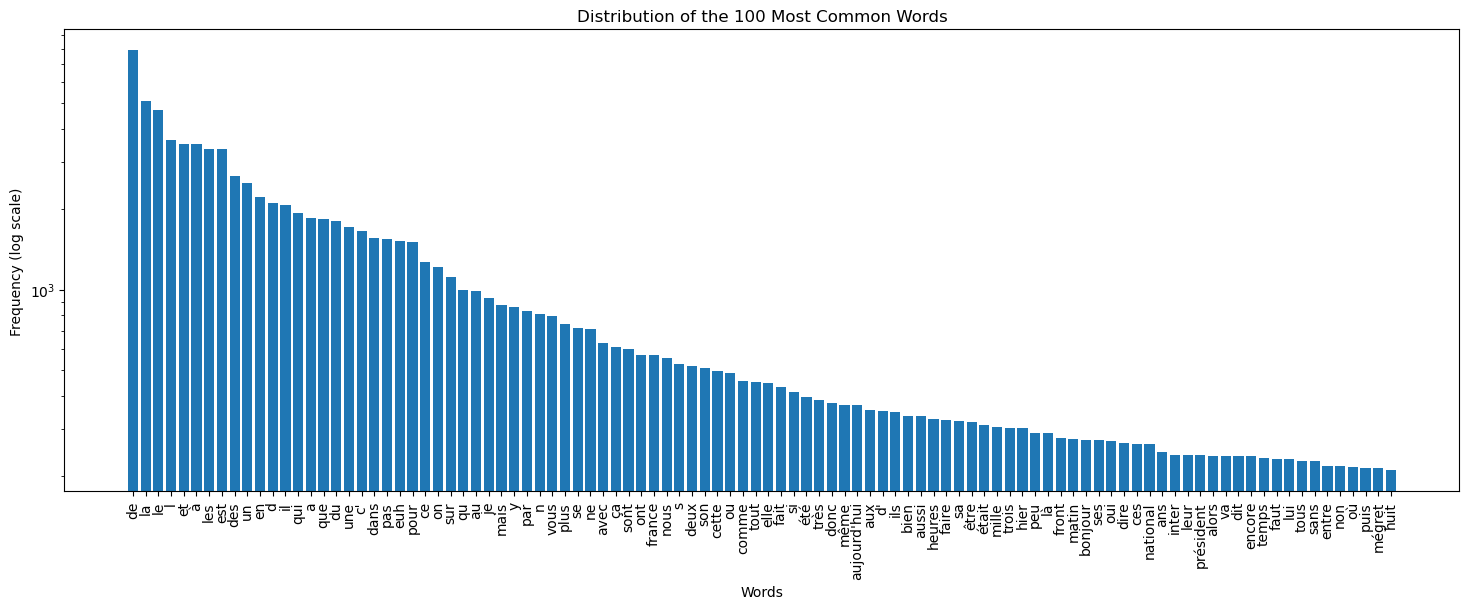

In [38]:
word_freq = Counter()

word_freq.update([token.text.lower() for token in entire_doc if not token.is_space and not token.is_punct])

sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))

top_100_words = list(sorted_word_freq.keys())[:100]
top_100_freq = list(sorted_word_freq.values())[:100]

plt.figure(figsize=(18, 6))
plt.bar(range(len(top_100_words)), top_100_freq)
plt.xticks(range(len(top_100_words)), top_100_words, rotation=90)
plt.yscale('log')
plt.xlabel('Words')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of the 100 Most Common Words')
plt.show()

## Stop words

Stop words are words that, under some frameworks, contribute marginal semantic value, but are important for syntax. For example, "the", "and", "such", etc.

**Question**: In what kind of analysis can we strike stop words without worrying about losing information? In what kind of analysis might we want to keep them around?

**-** Removing stop words is beneficial in analyses to extract keyword, topic modeling, and text classification. Bbecause it reduces noise and highlights significant words.

**-** In analyses where grammatical structure and nuanced meaning are crucial (advanced sentiment analysis, machine translation), stop words is important to preserve the integrity of the language.


**Question**: Write a function:

````def clean(sentence)````

that strikes all stop words, replaces each remaining token with its lemma. Create a cleaned version of each abstract, and save this cleaned version as a new column of the dataframe called "text_clean".

In [39]:
def clean(sentence):
    doc = nlp(sentence)
    cleaned_tokens = [token.lemma_ for token in doc if not token.is_stop]
    cleaned_sentence = " ".join(cleaned_tokens)
    return cleaned_sentence

df_radios["text_clean"] = df_radios.text.apply(clean)

In [40]:
entire_clean_doc = nlp(" ".join(df_radios.text_clean))

## Dependencies
spaCy calculates dependencies between different tokens:

In [41]:
exp_doc = nlp(one_text)
for word in exp_doc:
   print(word.text, word.tag_, word.head)

bonjour ADP bonjour


We can visualize this using dispacy, a visualization library:

In [42]:
from spacy import displacy
displacy.render(exp_doc, style='dep', jupyter=True, options={'distance': 130})

**Question**: Visualize a random title from the dataframe - describe the visualization.

**-** The visual representation shows the entities recognized in the text (person names, locations) and the grammatical structure, showing how words relate to each other.

## NER

spaCy can determine named entities.

In [43]:
for ent in nlp("Joe Biden is the president of the USA").ents:
    print("ENT: ", ent.text, ent.label_, spacy.explain(ent.label_))

ENT:  Joe Biden PER Named person or family.


**Question**: calculate the ten most common named entities and the five most common labels among the texts.

**-** The ten most common named entities identified are:

France (691 mentions),
Irak (450 mentions),
Monsieur (318 mentions),
Israël (302 mentions),
État (271 mentions),
Saddam Hussein (251 mentions),
Europe (229 mentions),
Ce Qu (223 mentions),
Hein (204 mentions),
Washington (168 mentions).

They highlight the frequent discussion topics or subjects within the corpus, including countries, notable individuals, and general nouns.

**-** The five most common labels (entity types) are:

PER (Person): 11,637 occurrences, 

LOC (Location): 6,966 occurrences,

ORG (Organization): 3,169 occurrences,

MISC (Miscellaneous): 2,275 occurrences.


In [44]:
named_entities = [ent.text for ent in entire_clean_doc.ents]
named_entities_freq = Counter(named_entities)
top_10_named_entities = named_entities_freq.most_common(10)


labels = [ent.label_ for ent in entire_clean_doc.ents]
labels_freq = Counter(labels)
top_5_labels = labels_freq.most_common(5)

top_10_named_entities, top_5_labels

([('france', 691),
  ('irak', 450),
  ('Monsieur', 318),
  ('israël', 302),
  ('état', 271),
  ('saddam hussein', 251),
  ('europe', 229),
  ('ce_qu', 223),
  ('hein', 204),
  ('washington', 168)],
 [('PER', 11637), ('LOC', 6966), ('ORG', 3169), ('MISC', 2275)])

## TF-IDF

One of the most important statistics we can calculate for a document is the TF-IDF score. This stands for "term frequency-inverse document frequency" score, and it is a measure of the importance of each word to a given document, in the context of the corpus of documents. For each word in each document, we calculate the following ratio:

${TF_{word; doc}}\times{IDF_{word; doc}}$

$TF_{word; doc} = \frac{\text{Total counts of word in doc}}{\text{Number of terms in doc}}$

$IDF_{word; doc} = \log{\left(\frac{|\text{corpus}|}{\text{Number of docs containing word}}\right)}$

To have a high TF-IDF score in a document, a word must occur frequently in a document, while appearing rarely in others.

**Question**: Give the limits of TF and IDF for a word/document pair, and give an example of a word-document pair where this might occur (for example, word="Hello", doc=Wikipedia page for greetings, corpus=all of Wikipedia).

**-** TF can range from 0 to 1, where 0 indicates the word does not occur in the document, and 1 indicates the word occurs in every term of the document.

IDF is greater than or equal to 0. The IDF value approaches 0 as the word appears in more documents, making it less unique.

**-** Example: A word "unique" appearing many times in a specific document but rarely elsewhere in the corpus would have a high TF-IDF score in that document, indicating its significance.

**-** Calculation Results: We calculated the TF-IDF score of "radio" in a specific document, we obtained 1.6045803908070724. This score suggests that "radio" is a relatively significant term in that document within the context of the entire corpus.


**Question**: Code the functions TF and IDF:


In [45]:
def tf(word, document):
    doc = nlp(document)
    counter = sum(1 for token in doc if token.text == word)
    total_words = len(doc)
    if total_words == 0:
        return 0
    return counter / total_words

def idf(word, all_documents):
    num_doc_cont_word = sum(1 for doc in all_documents if word in doc)
    corpus = len(all_documents)
    return math.log(corpus / (1+num_doc_cont_word))

def tf_idf(word, document, all_documents):
    return tf(word, document)*idf(word, all_documents)

#test
my_text = df_radios.iloc[15450].text_clean
tf_idf("radio", my_text, df_radios.text_clean)

1.6045803908070724

In [46]:
#Top 30 mots ayant la plus grande frequence
word_freq = Counter()
word_freq.update([token.text.lower() for token in entire_clean_doc if not token.is_space and not token.is_punct])
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
top_10_words = list(sorted_word_freq.keys())[:10]

**Question**: What is the word with the highest and lowest TF-IDF score?

**-** The analysis revealed "defar" as the word with the highest TF-IDF score (0.9374611099512729) in a given document, indicating its unique importance to that text. 

**-** The word "l" had the lowest score (0.023508668841296057), suggesting it's common and less significant within the context of the document.

In [47]:
df_radios.text_clean

0                                          patricia martin
1                              oh bonjour nicola stoufflet
2                                     france - inter heure
3                                    journal simon tivolle
4                                                  bonjour
                               ...                        
35351    sport athlétisme terminer triple champion mond...
35352    l ' éthiopien defar meseret entrer temps minut...
35353    fin édition rappel principal titre orier islam...
35354    libéria l ' armée charles taylor alerte maximu...
35355    aimable attention rappeler être l ' écoute d '...
Name: text_clean, Length: 35356, dtype: object

In [48]:
def max_min_tfidf(my_text):
    max_score = 0
    word_max_score = ""
    min_score = float('inf')
    word_min_score = ""
    for word in my_text.split():        
        score = tf_idf(word, my_text, df_radios.text_clean)
        if score > max_score:
            max_score = score
            word_max_score = word
        if score < min_score:
            min_score = score
            word_min_score = word
    print(f"Max score for {word_max_score}: {max_score}")
    print(f"Min score for {word_min_score}: {min_score}")

In [49]:
my_text = df_radios.text_clean.iloc[35352]
max_min_tfidf(my_text)

Max score for defar: 0.9374611099512729
Min score for l: 0.023508668841296057


**Question**: If we took each document and duplicated it in place, i.e.:

a document "hello world" would become "hello world hello world", how would the tf-idf score of any document-word pair change?

**-** Duplicating a document in place (e.g., making "hello world" into "hello world hello world") would not change the TF-IDF scores for its words. The increase in term frequency (TF) is offset by the document's increased length, and IDF remains unchanged since the corpus's document count is constant.

What about if instead of duplicating in place, we doubled the size of the corpus, i.e.

if document "hello world" is in the corpus once, we add a second copy so now it is in the corpus twice. How would the tf-idf score of any document-word pair change now?

**-** Doubling the size of the corpus by adding a duplicate of each document will affect the IDF values. 

**-** The IDF for each word decreases because the document count for each word increases, potentially reducing the TF-IDF scores. However, TF remains unchanged since the document content doesn't change.

If we were to duplicate each document within the corpus, it wouldn't affect the IDF value. This is because whether a word appears in a document or not remains unchanged after duplication, and the corpus size remains constant.

Similarly, the TF value wouldn't be altered because the ratio of the total counts of a word to the number of terms in the document remains the same. 

$newTF_{word; doc} = \frac{2*\text{Total counts of word in doc}}{2*\text{Number of terms in doc}} = TF_{word; doc}$

Hence, the new TF value after duplication ($newTF_{word; doc}$) would be equal to the original TF value ($TF_{word; doc}$). Consequently, duplicating the documents would not alter the TF-IDF score.


If document "hello world" is in the corpus once, we add a second copy so now it is in the corpus twice.

The TF value wouldn't change because the document didn't change.

But the IDF would change because the number of corpus and the number of docs containing word would increase of one

Therefore altering the TF-IDF score

**Question**: What could be a potential use-case for the TF-IDF score in practice?

**-** TF-IDF is particularly could be used in search engines and information retrieval systems. It helps in ranking documents based on their relevance to a search query. Words that are frequent in a document but rare across the corpus are likely to be more relevant, allowing such documents to be ranked higher in search results. It can increase the accuracy and relevance of search operations.

### Final Comments 

Add your conclusions about this lab. You can include your level of satisfation with your work and your opinion on the length and difficulty of the exercises.

**-** Conclusions: The exercise helped us to demonstrat the significance of TF-IDF in understanding the relevance of words within a document relative to a corpus. Implementing the TF-IDF calculation from scratch was particularly interesting.

**-** Level of Satisfaction: High. The exercise had a good balance between theory and practical application.

**-** Exercise Length and Difficulty: The length was appropriate, but a bit long, since we needed to continue at home due to the waiting execution time, and the personal computer crached more than once. The difficulty level was moderate, challenging enough to be engaging but not discouraging.

**-** Key Learning: The practical application of TF-IDF in a dataset, exploration of document and corpus TF-IDF scores changes.